In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [80]:
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_colWidth' , None)

In [81]:
df = pd.read_csv('Gurgaon_Properties_missing_values_cleaned_data.csv')

In [82]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Property_type    3553 non-null   object 
 1   society          3553 non-null   object 
 2   sector           3553 non-null   object 
 3   price            3553 non-null   float64
 4   price_per_sqft   3553 non-null   float64
 5   bedRoom          3553 non-null   int64  
 6   bathroom         3553 non-null   int64  
 7   balcony          3553 non-null   object 
 8   floorNum         3553 non-null   float64
 9   agePossession    3553 non-null   object 
 10  built_up_area    3553 non-null   float64
 11  study room       3553 non-null   int64  
 12  servant room     3553 non-null   int64  
 13  store room       3553 non-null   int64  
 14  pooja room       3553 non-null   int64  
 15  others           3553 non-null   int64  
 16  furnishing_type  3553 non-null   int64  
 17  luxury_score  

In [84]:
df.head(2)

,Property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 12,2.90,10741.0,7,7,3,2.0,Old Property,2700.0,0,0,0,0,0,1,7
1,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,2,79


In [85]:
df.shape

(3553, 18)

In [86]:
df.duplicated().sum()

np.int64(3)

In [87]:
df.drop_duplicates(inplace=True)

In [88]:
df.isnull().sum()

,0
Property_type,0
society,0
sector,0
price,0
price_per_sqft,0
bedRoom,0
bathroom,0
balcony,0
floorNum,0
agePossession,0


In [89]:
train_df = df.drop(columns = ['society' , 'price_per_sqft'])

In [90]:
train_df.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,sector 12,2.90,7,7,3,2.0,Old Property,2700.0,0,0,0,0,0,1,7
1,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,2,79
2,flat,sector 22,2.55,3,3,3,8.0,Relatively New,1860.0,0,0,0,0,1,0,125
3,house,sector 28,8.95,5,6,3+,4.0,Moderately Old,5000.0,0,0,0,0,0,1,0
4,flat,sector 104,0.98,3,3,3,12.0,Relatively New,1490.0,0,0,0,0,1,1,79


<Axes: >

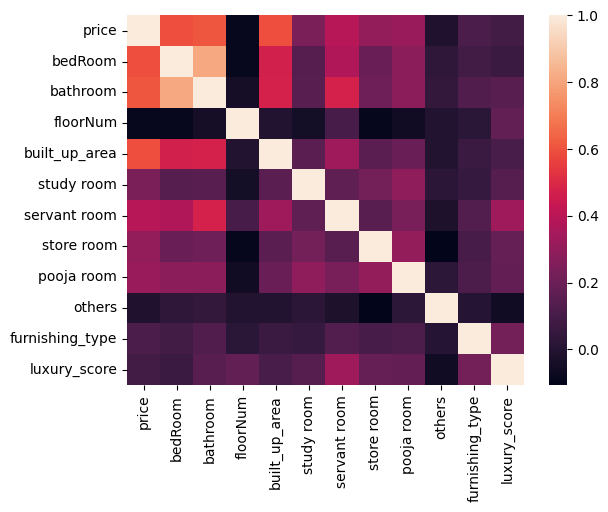

In [91]:
sns.heatmap(train_df.corr(numeric_only = True))

In [92]:
train_df.corr(numeric_only=True)['price'].sort_values(ascending=False)

,price
price,1.000000
bathroom,0.610154
built_up_area,0.592999
bedRoom,0.591400
servant room,0.391813
pooja room,0.318831
store room,0.304226
study room,0.241683
furnishing_type,0.112536
luxury_score,0.091811


##  **luxury score**

<Axes: ylabel='luxury_score'>

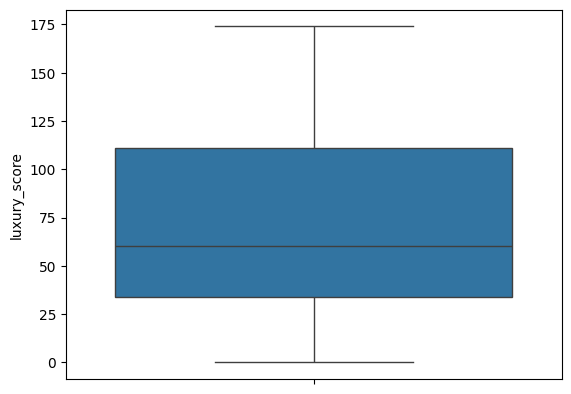

In [93]:
sns.boxplot(df['luxury_score'])

In [94]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [95]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [96]:
train_df.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,house,sector 12,2.90,7,7,3,2.0,Old Property,2700.0,0,0,0,0,0,1,7,Low
1,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,2,79,Medium
2,flat,sector 22,2.55,3,3,3,8.0,Relatively New,1860.0,0,0,0,0,1,0,125,Medium
3,house,sector 28,8.95,5,6,3+,4.0,Moderately Old,5000.0,0,0,0,0,0,1,0,Low
4,flat,sector 104,0.98,3,3,3,12.0,Relatively New,1490.0,0,0,0,0,1,1,79,Medium


## **floorNum**

<Axes: xlabel='floorNum'>

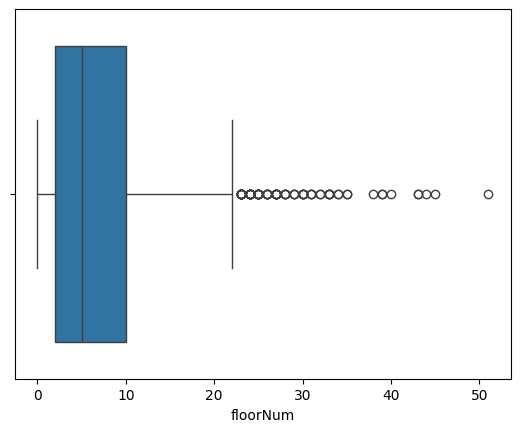

In [98]:
sns.boxplot(x = df['floorNum'])

In [99]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [100]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [101]:
train_df.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,house,sector 12,2.90,7,7,3,2.0,Old Property,2700.0,0,0,0,0,0,1,7,Low,Low Floor
1,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,2,79,Medium,High Floor
2,flat,sector 22,2.55,3,3,3,8.0,Relatively New,1860.0,0,0,0,0,1,0,125,Medium,Mid Floor
3,house,sector 28,8.95,5,6,3+,4.0,Moderately Old,5000.0,0,0,0,0,0,1,0,Low,Mid Floor
4,flat,sector 104,0.98,3,3,3,12.0,Relatively New,1490.0,0,0,0,0,1,1,79,Medium,High Floor


In [102]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [103]:
train_df.head()

,Property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,house,sector 12,2.90,7,7,3,Old Property,2700.0,0,0,0,0,0,1,Low,Low Floor
1,flat,sector 77,0.86,2,2,2,New Property,1214.0,0,0,0,0,0,2,Medium,High Floor
2,flat,sector 22,2.55,3,3,3,Relatively New,1860.0,0,0,0,0,1,0,Medium,Mid Floor
3,house,sector 28,8.95,5,6,3+,Moderately Old,5000.0,0,0,0,0,0,1,Low,Mid Floor
4,flat,sector 104,0.98,3,3,3,Relatively New,1490.0,0,0,0,0,1,1,Medium,High Floor


**Imp Point**
   - here we use ordinal encoding because while doing feature selection there are some tree based models which are not affected by using ordinal encoading and for linear model this could be not reliable

In [104]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    label_encoded[col] = oe.fit_transform(label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = label_encoded.drop('price', axis=1)
y_label = label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [105]:
X_label

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,18.0,7,7,3.0,2.0,2700.000000,0,0,0,0,0,1,1.0,1.0
1,0.0,87.0,2,2,2.0,1.0,1214.000000,0,0,0,0,0,2,2.0,0.0
2,0.0,27.0,3,3,3.0,3.0,1860.000000,0,0,0,0,1,0,2.0,2.0
3,1.0,33.0,5,6,4.0,0.0,5000.000000,0,0,0,0,0,1,1.0,2.0
4,0.0,6.0,3,3,3.0,3.0,1490.000000,0,0,0,0,1,1,2.0,0.0
5,0.0,107.0,2,2,2.0,1.0,632.000000,0,0,0,0,0,2,1.0,1.0
6,0.0,83.0,4,5,4.0,3.0,2800.000000,0,1,0,0,0,2,0.0,2.0
7,1.0,11.0,4,5,3.0,3.0,5400.000000,0,1,0,0,0,1,1.0,1.0
8,0.0,77.0,3,2,4.0,1.0,1365.000000,0,0,0,0,0,1,1.0,2.0
9,0.0,68.0,2,3,2.0,3.0,1520.000000,0,0,1,0,0,2,0.0,1.0


- **Now we will use diffrent type of feature selecton techniques for getting the important features for our model**

## **1 - Correlation Analysis**


<Axes: >

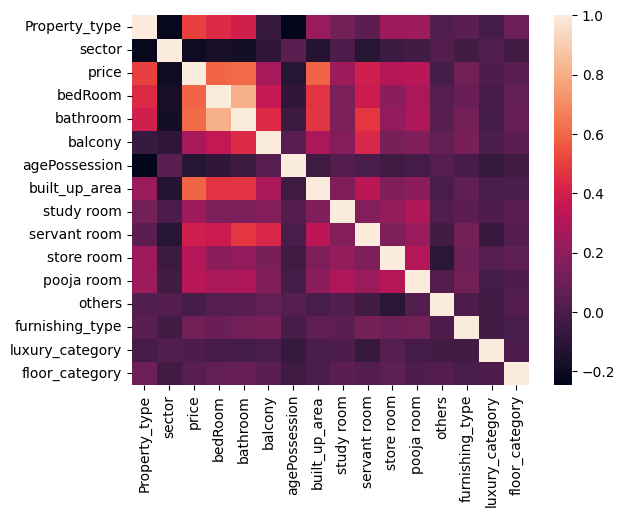

In [106]:
sns.heatmap(label_encoded.corr(numeric_only =  True))

In [107]:
fi_df1 = label_encoded.corr(numeric_only=True)['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201595
1,price,1.000000
2,bedRoom,0.591400
3,bathroom,0.610154
4,balcony,0.269377
5,agePossession,-0.118423
6,built_up_area,0.592999
7,study room,0.241683
8,servant room,0.391813
9,store room,0.304226


## **2 - Random Forest Feature Importance**


In [108]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.643816
1,sector,0.105053
0,Property_type,0.101672
2,bedRoom,0.030474
3,bathroom,0.024200
8,servant room,0.019652
5,agePossession,0.014835
4,balcony,0.012902
12,furnishing_type,0.009428
9,store room,0.008216


## **3 - Gradient Boosting Feature Importance**


In [109]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.674774
1,sector,0.105017
0,Property_type,0.098686
3,bathroom,0.038475
2,bedRoom,0.036980
8,servant room,0.028075
5,agePossession,0.006150
9,store room,0.005653
12,furnishing_type,0.001856
7,study room,0.001680


## **4 - Permutation Feature Importance**


In [110]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.700295
0,Property_type,0.222969
1,sector,0.202777
8,servant room,0.024745
2,bedRoom,0.019306
3,bathroom,0.014403
5,agePossession,0.008966
4,balcony,0.005956
13,luxury_category,0.002898
11,others,0.000593


## **5 - Lasso**


In [111]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,0.917986
0,Property_type,0.714345
3,bathroom,0.480101
8,servant room,0.302530
2,bedRoom,0.266433
9,store room,0.232226
7,study room,0.190667
10,pooja room,0.112744
13,luxury_category,0.058694
12,furnishing_type,0.041883


## **6 - RFE**


In [112]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.643481
1,sector,0.103038
0,Property_type,0.099143
2,bedRoom,0.031343
3,bathroom,0.024875
8,servant room,0.022686
5,agePossession,0.014398
4,balcony,0.012469
12,furnishing_type,0.009814
10,pooja room,0.008126


## **7 - Linear regression Weight**


In [114]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,0.920651
0,Property_type,0.719907
3,bathroom,0.478408
8,servant room,0.305687
2,bedRoom,0.266667
9,store room,0.234907
7,study room,0.197123
10,pooja room,0.116104
13,luxury_category,0.068456
12,furnishing_type,0.049258


## **8 - SHAP**


In [115]:
!pip install shap

In [116]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 4.59957139e-01, -7.56727499e-01,  3.67138623e-02, ...,
        -6.31714125e-02, -3.98103322e-02, -1.75364312e-02],
       [-1.52389318e-01, -2.12045131e-01, -5.64317984e-02, ...,
         1.48929786e-03,  2.07271951e-03,  3.43662902e-02],
       [-2.75125912e-01,  2.48977736e-01, -3.29543280e-02, ...,
         1.75635088e-01,  1.60208376e-03, -1.75549154e-02],
       ...,
       [-3.38910304e-01,  4.23373410e-01, -3.32568025e-02, ...,
         3.29514669e-03,  1.87754203e-02, -4.71093990e-02],
       [-3.16135017e-01, -3.87613941e-01, -3.31758893e-02, ...,
        -4.18876420e-02, -2.33482202e-02, -4.22491537e-02],
       [ 1.77739233e+00,  1.63471609e+00,  5.47975235e-01, ...,
         6.46496797e-02, -1.49427315e-03, -9.90404966e-02]])

In [117]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.242235
0,Property_type,0.469265
1,sector,0.387388
3,bathroom,0.115870
8,servant room,0.095742
2,bedRoom,0.070023
4,balcony,0.040621
14,floor_category,0.026169
12,furnishing_type,0.026134
5,agePossession,0.025108


In [118]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [119]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201595,0.105053,0.105017,0.202777,-0.093549,0.103038,-0.100885,0.387388
bedRoom,0.591400,0.030474,0.036980,0.019306,0.266433,0.031343,0.266667,0.070023
bathroom,0.610154,0.024200,0.038475,0.014403,0.480101,0.024875,0.478408,0.115870
balcony,0.269377,0.012902,0.000949,0.005956,0.000267,0.012469,0.007093,0.040621
agePossession,-0.118423,0.014835,0.006150,0.008966,-0.044021,0.014398,-0.051951,0.025108
built_up_area,0.592999,0.643816,0.674774,0.700295,0.917986,0.643481,0.920651,1.242235
study room,0.241683,0.007893,0.001680,-0.004684,0.190667,0.007182,0.197123,0.019124
servant room,0.391813,0.019652,0.028075,0.024745,0.302530,0.022686,0.305687,0.095742
store room,0.304226,0.008216,0.005653,-0.000819,0.232226,0.006869,0.234907,0.016448


In [120]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [121]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.698720
sector,0.148302
bathroom,0.033465
bedRoom,0.032605
servant room,0.029872
agePossession,0.012106
balcony,0.010952
furnishing_type,0.006414
store room,0.006008


In [122]:
# to drop pooja room, study room, others
X_label.head()

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,1.0,18.0,7,7,3.0,2.0,2700.0,0,0,0,0,0,1,1.0,1.0
1,0.0,87.0,2,2,2.0,1.0,1214.0,0,0,0,0,0,2,2.0,0.0
2,0.0,27.0,3,3,3.0,3.0,1860.0,0,0,0,0,1,0,2.0,2.0
3,1.0,33.0,5,6,4.0,0.0,5000.0,0,0,0,0,0,1,1.0,2.0
4,0.0,6.0,3,3,3.0,3.0,1490.0,0,0,0,0,1,1,2.0,0.0


In [123]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [124]:
scores.mean()

np.float64(0.8056409590302698)

In [125]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [126]:
scores.mean()

np.float64(0.8042169238324322)

- There is no change in r2 score while keeping pooja room , study room, other or keeping not so we can drop these columns

In [127]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [128]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [129]:
export_df.head()

,Property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,1.0,18.0,7,7,3.0,2.0,2700.0,0,0,1,1.0,1.0,2.90
1,0.0,87.0,2,2,2.0,1.0,1214.0,0,0,2,2.0,0.0,0.86
2,0.0,27.0,3,3,3.0,3.0,1860.0,0,0,0,2.0,2.0,2.55
3,1.0,33.0,5,6,4.0,0.0,5000.0,0,0,1,1.0,2.0,8.95
4,0.0,6.0,3,3,3.0,3.0,1490.0,0,0,1,2.0,0.0,0.98
